In [966]:
import os
import sys
import pandas
import IPython
smooth = pandas.rolling_mean
sys.path += [os.getenv('HOME') + path for path in 
             ['/Dist/fully-neural-lvsr',
              '/Dist/fully-neural-lvsr/libs/Theano',
              '/Dist/fully-neural-lvsr/libs/blocks']]
from blocks.serialization import load, load_parameters
from matplotlib import pyplot
from pprint import pprint
from lvsr.datasets.mt import H5PyMTDataset
%matplotlib inline

In [790]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
cd /data/lisatmp4/bahdanau/mt2

/data/lisatmp4/bahdanau/mt2


In [3]:
logs = {}
dfs = {}

In [855]:
def load_model(path):
    log = load(open(path), name='log')
    df = pandas.DataFrame.from_dict(log, orient='index')
    name = path[:-4] if path[-3:] == 'tar' else path
    logs[name] = log
    dfs[name] = df
    if 'best_valid_train_cost' in log.status:
        print 'best_valid_train_cost', log.status['best_valid_train_cost']
    if 'best_valid_mean_total_reward' in log.status:
        print 'best_valid_mean_total_reward', log.status['best_valid_mean_total_reward']
    if 'mean_total_reward' in dfs[name]:
        print 'mean_total_reward:', dfs[name].mean_total_reward[-10:].mean()
    
def compare_log_likelihood(models, s=slice(None)):
    pyplot.figure(figsize=(10, 5))
    legend = []
    for m in models:
        dfs[m].train_cost.astype('float32').dropna().loc[s].plot()
        dfs[m].valid_train_cost.astype('float32').dropna().loc[s].plot(ls='--')
        legend += ['train_' + m]
        legend += ['valid_' + m]
    pyplot.legend(legend)
    
def compare_actor_critic_costs(models, s=slice(None)):
    pyplot.figure(figsize=(10, 5))
    legend = []
    for m in models:
        dfs[m].readout_costs_mean_critic_cost.astype('float32').dropna().loc[s].plot()
        legend += [m]
    pyplot.legend(legend)    
    
def compare_rewards_and_errors(models, s=slice(None)):
    pyplot.figure(figsize=(15, 10))
    legend = []
    for m in models:
        dfs[m].mean_total_reward.astype('float32').dropna().loc[s].plot()
        legend += ['train_' + m]        
        if 'valid_mean_total_reward' in dfs[m]:
            dfs[m].valid_mean_total_reward.astype('float32').dropna().loc[s].plot(ls='--')
            legend += ['valid_' + m]
    pyplot.ylim(ymin=0)
    pyplot.legend(legend, loc='best')
    pyplot.xlabel("Iterations")
    pyplot.ylabel("Reward")
    pyplot.title('Reward')
    pyplot.show()
    
    pyplot.figure(figsize=(15, 5))
    for m in models:
        dfs[m].readout_costs_mean_critic_cost.astype('float32').dropna().loc[s].plot()
    pyplot.legend(models, loc='best')
    pyplot.xlabel("Iterations")
    pyplot.ylabel("Reward")
    pyplot.title('Critic error')
    pyplot.show()
    
    pyplot.figure(figsize=(15, 5))
    for m in models:
        dfs[m].readout_costs_mean_actor_cost.astype('float32').dropna().loc[s].plot()
    pyplot.legend(models, loc='best')
    pyplot.xlabel("Iterations")
    pyplot.ylabel("Reward")
    pyplot.title('Actor error')
    pyplot.show()    
   
def compare_per(models, s=slice(None)):
    pyplot.figure(figsize=(10, 5))
    legend = []
    for m in models:
        dfs[m].valid_per.astype('float32').dropna().loc[s].plot(ls='--')
        legend += [m]
    pyplot.legend(legend)    
    
def compare_gradient_norms(models):
    legend = []
    for m in models:
        dfs[m].total_gradient_norm.astype('float32').dropna().plot(use_index=False)
        legend += [m]
    pyplot.legend(legend)
    pyplot.title('Gradient norm')

def compare_max_adjustments(models):
    legend = []
    for m in models:
        dfs[m].readout_costs_max_adjustment.astype('float32').dropna().plot()
        legend += [m]
    pyplot.legend(legend)
    pyplot.title('Max adjustment')
    
def compare_weight_entropy(models):
    legend = []
    for m in models:
        dfs[m].average_weights_entropy_per_label.astype('float32').dropna().plot()
        legend += [m]
    pyplot.legend(legend)
    pyplot.title('Weight entropy')
    pyplot.show()
    
def compare_entropies(models, s=slice(None)):
    legend = []
    for m in models:
        dfs[m].readout_costs_mean_actor_entropy.astype('float32').dropna().loc[s].plot()
        legend += [m]
    pyplot.legend(legend)
    pyplot.title('Entropy')

## Actor pretraining

In [924]:
# load_model('ted1e/main.tar')
# load_model('ted1i/main.tar')
# load_model('ted1x/main.tar')
load_model('ted1y/main.tar')
load_model('ted1y/annealing.tar')

best_valid_train_cost 50.1516418457
best_valid_train_cost 51.035823822


## Critic pretraining 

In [212]:
# load_model('ted2/critic_pretraining.tar')
load_model('ted3a/critic_pretraining.tar')
load_model('ted3b/critic_pretraining.tar')
load_model('ted3c/critic_pretraining.tar')
# Without using actor states
load_model('ted3e/critic_pretraining.tar')
# With back-propagation through the right-hand side
load_model('ted3f/critic_pretraining.tar')
load_model('ted3k/critic_pretraining.tar')
# load_model('ted4k/critic_pretraining.tar')
# load_model('ted7/critic_pretraining.tar')
# load_model('ted8/critic_pretraining.tar')

mean_total_reward: 4.78993055556
mean_total_reward: 4.620625
mean_total_reward: 4.65677083333
mean_total_reward: 4.80107638889
mean_total_reward: 4.14878472222
mean_total_reward: 6.88083333333


In [116]:
# load_model('ted4/critic_pretraining.tar')
# load_model('ted4a/critic_pretraining.tar')
# load_model('ted4a1/critic_pretraining.tar')
# load_model('ted4b/critic_pretraining.tar')
# load_model('ted4c/critic_pretraining.tar')
# load_model('ted4d/critic_pretraining.tar')
# load_model('ted4e/critic_pretraining.tar')
# load_model('ted4f/critic_pretraining.tar')
# load_model('ted4g/critic_pretraining.tar')
# load_model('ted4h/critic_pretraining.tar')
# load_model('ted4k/critic_pretraining.tar')

mean_total_reward: 1.4319723977
mean_total_reward: 1.75060462952
mean_total_reward: 2.08893013
mean_total_reward: 1.64400524563
mean_total_reward: 1.26427258386
mean_total_reward: 1.60714054108
mean_total_reward: 1.57896031274
mean_total_reward: 1.18813334571
mean_total_reward: 1.56072860294
mean_total_reward: 2.15120315552
mean_total_reward: 4.94235483805


In [216]:
# load_model('ted9/critic_pretraining.tar')
# load_model('ted9k/critic_pretraining.tar')
load_model('ted9c/critic_pretraining.tar')
load_model('ted9l/critic_pretraining.tar')

mean_total_reward: 2.46866268582
mean_total_reward: 5.08094702827


In [134]:
load_model('ted6/critic_pretraining.tar')
load_model('ted6a/critic_pretraining.tar')
load_model('ted6b/critic_pretraining.tar')
load_model('ted6c/critic_pretraining.tar')
load_model('ted6f/critic_pretraining.tar')
load_model('ted6h/critic_pretraining.tar')
load_model('ted6g/critic_pretraining.tar')
load_model('ted6k/critic_pretraining.tar')

mean_total_reward: 5.16104166667
mean_total_reward: 4.93111111111
mean_total_reward: 5.16026785714
mean_total_reward: 4.93
mean_total_reward: 4.2103125
mean_total_reward: 5.33909722222
mean_total_reward: 5.24652777778
mean_total_reward: 7.56045138889


In [699]:
# load_model('ted11/critic_pretraining.tar')
# load_model('ted11a/critic_pretraining.tar')
# load_model('ted11b/critic_pretraining.tar')
# load_model('ted11c/critic_pretraining.tar')
# load_model('ted11d/critic_pretraining.tar')
# load_model('ted11e/critic_pretraining.tar')
# load_model('ted11f/critic_pretraining.tar')
# load_model('ted11g/critic_pretraining.tar')
# load_model('ted11h/critic_pretraining.tar')
load_model('ted11q/critic_pretraining.tar')
load_model('ted11r/critic_pretraining.tar')
load_model('ted11s/critic_pretraining.tar')
load_model('ted11t/critic_pretraining.tar')
load_model('ted11u/critic_pretraining.tar')

mean_total_reward: 3.12834231059
mean_total_reward: 3.12834231059
mean_total_reward: 3.53378486633
mean_total_reward: 3.43945036994
mean_total_reward: 3.12834231059


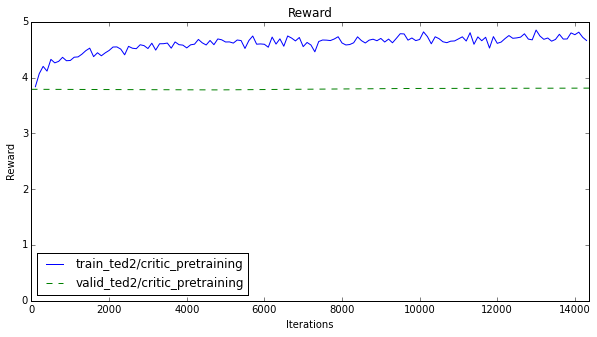

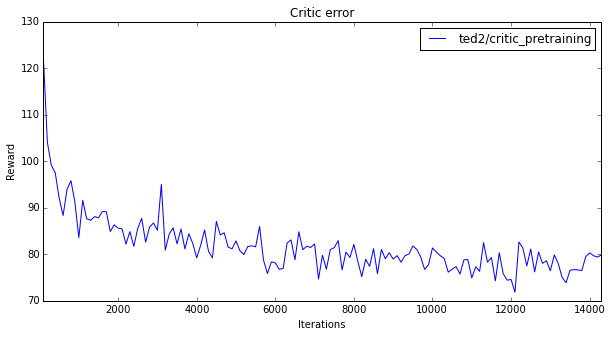

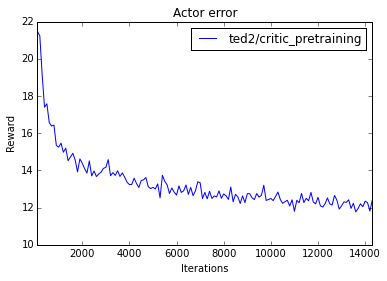

In [23]:
# The only run without DP
compare_rewards_and_errors(
    ['ted2/critic_pretraining'])

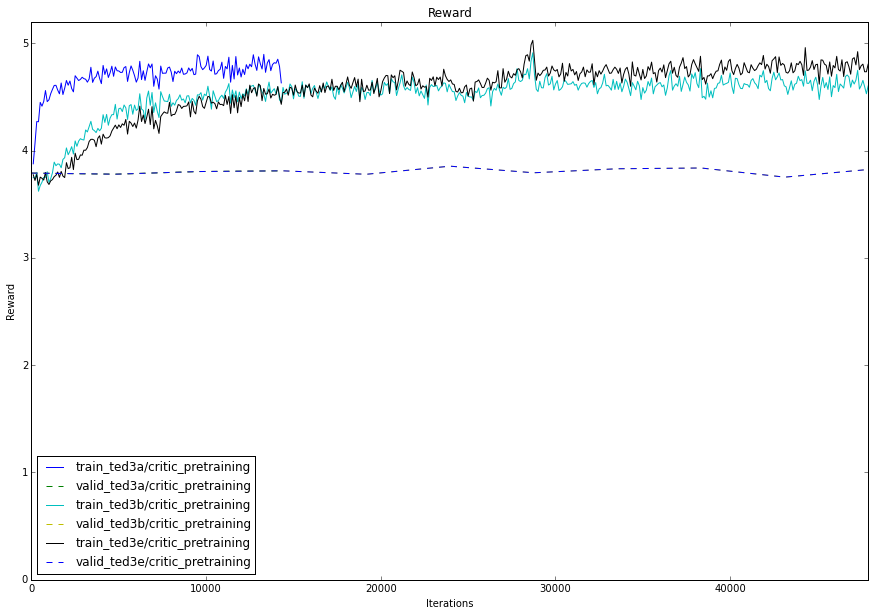

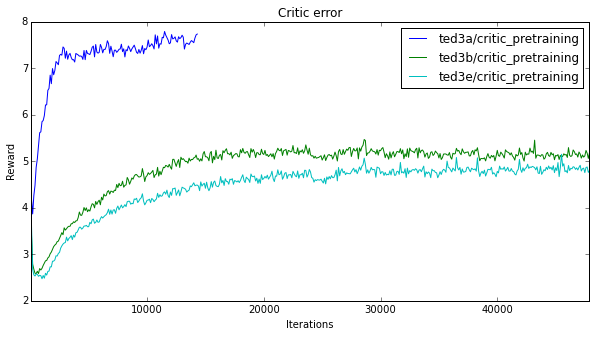

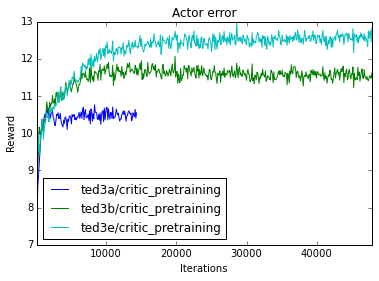

In [214]:
# Preliminary experiments with convolutional encoder in critic 
compare_rewards_and_errors(
    [#'ted3/critic_pretraining',
     'ted3a/critic_pretraining',
     'ted3b/critic_pretraining',
     'ted3e/critic_pretraining',
     #'ted3f/critic_pretraining',
     ])

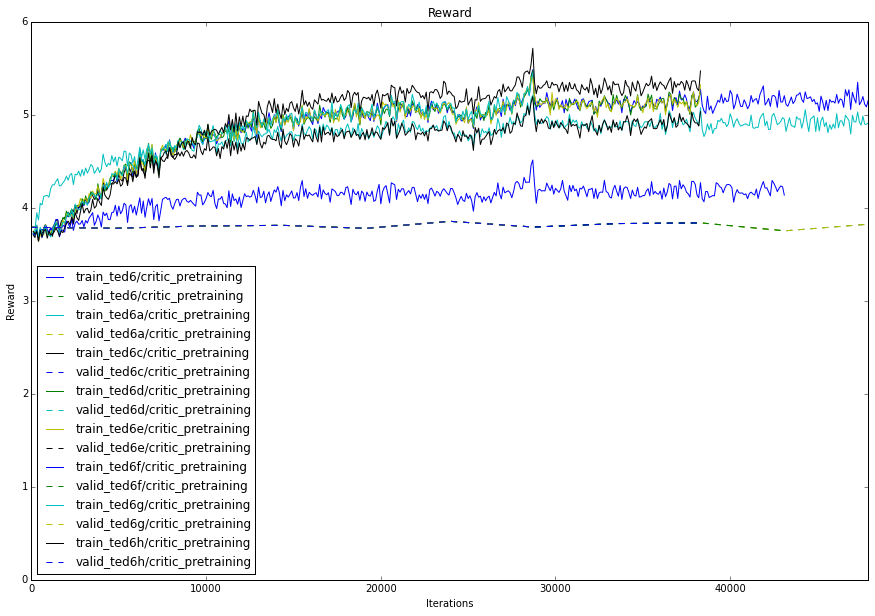

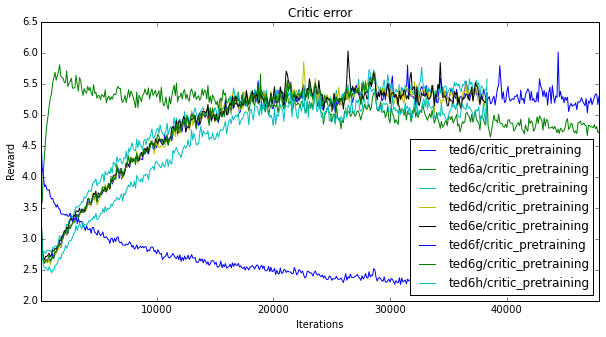

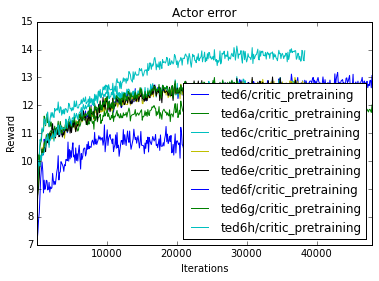

In [145]:
# Edit distance
compare_rewards_and_errors(
    ['ted6/critic_pretraining',
     'ted6a/critic_pretraining',
     'ted6c/critic_pretraining',
     'ted6d/critic_pretraining',
     'ted6e/critic_pretraining',
     'ted6f/critic_pretraining',
     'ted6g/critic_pretraining',
     'ted6h/critic_pretraining'
    ])

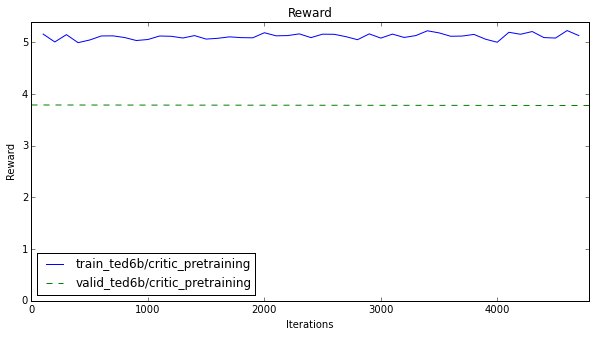

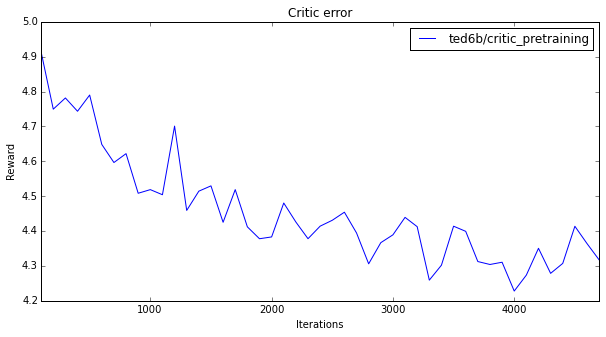

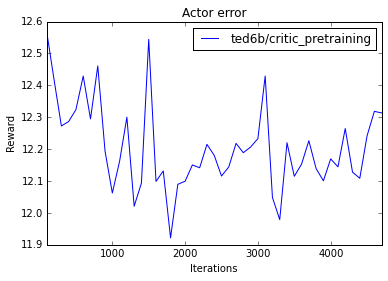

In [72]:
# Annealing
compare_rewards_and_errors(
    [#'ted3c/critic_pretraining',
     'ted6b/critic_pretraining'])

In [61]:
# BLEU
compare_rewards_and_errors(
    ['ted4/critic_pretraining',
     'ted4a/critic_pretraining',
     'ted4b/critic_pretraining',
     'ted4d/critic_pretraining',
     'ted4e/critic_pretraining',
     'ted4f/critic_pretraining',
     'ted4g/critic_pretraining',
     'ted4h/critic_pretraining',
     'ted4a1/critic_pretraining'])

KeyError: 'ted4/critic_pretraining'

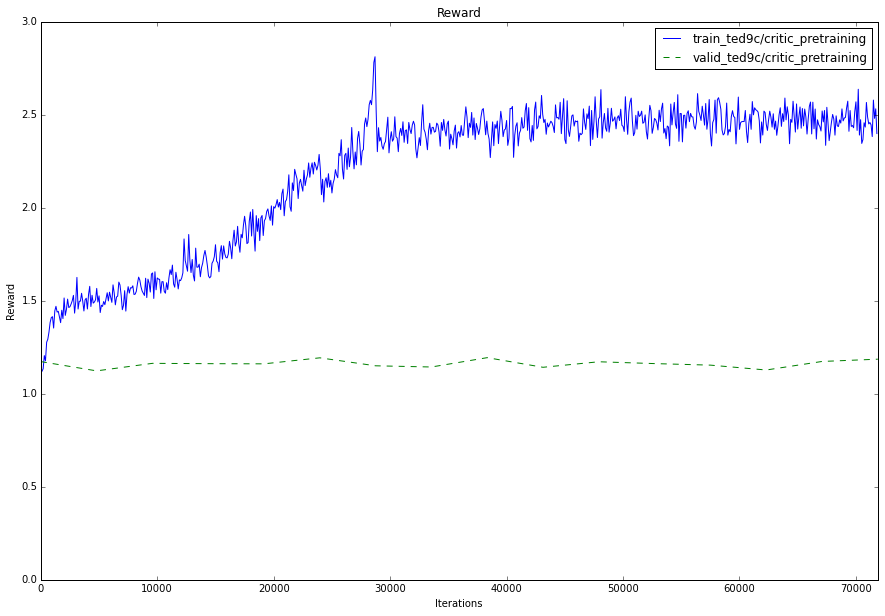

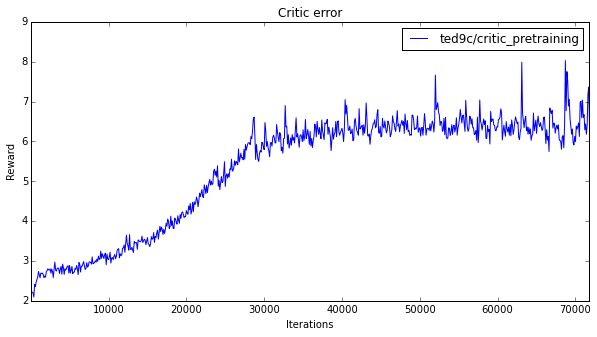

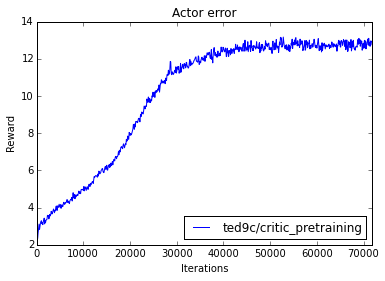

In [217]:
compare_rewards_and_errors(
    ['ted9c/critic_pretraining'])

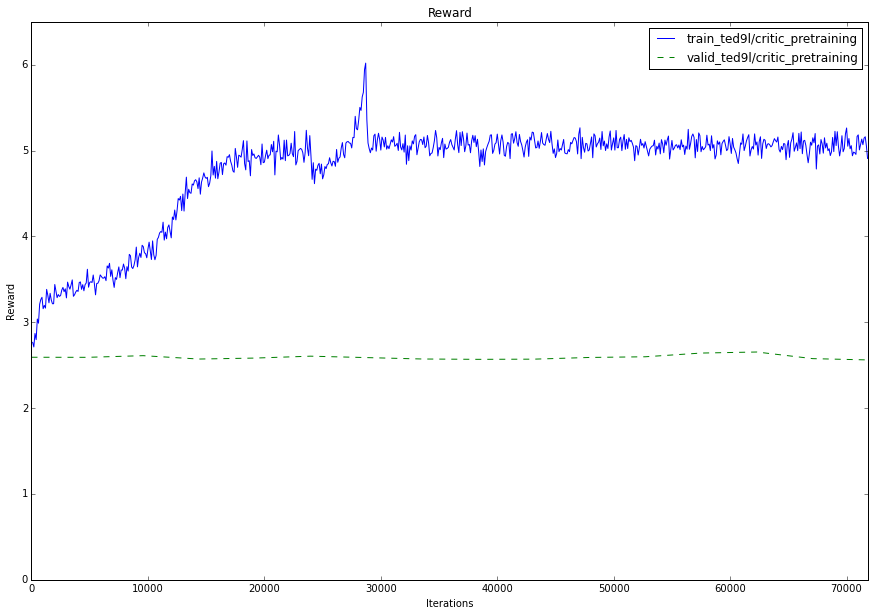

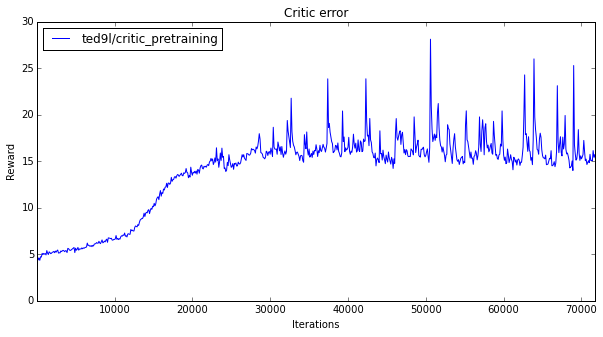

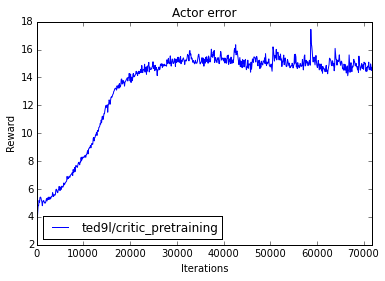

In [218]:
compare_rewards_and_errors(
    ['ted9l/critic_pretraining'])

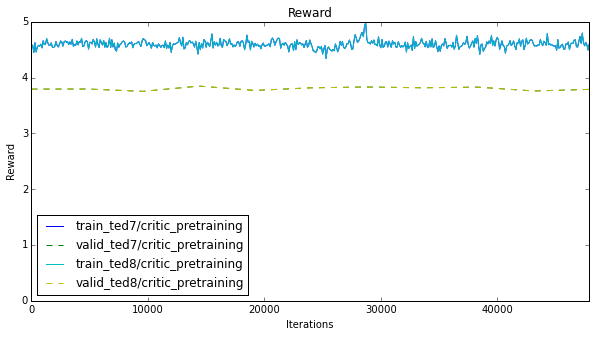

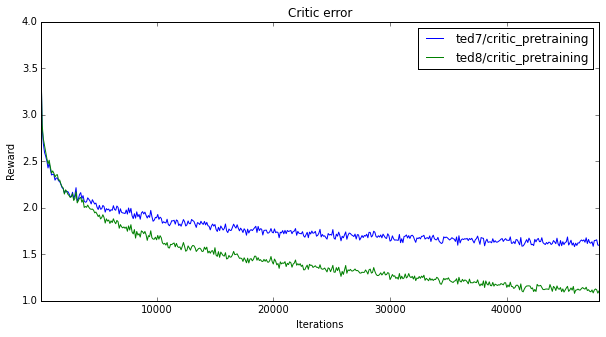

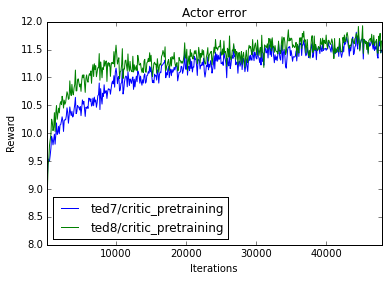

In [580]:
# Reward prediction
compare_rewards_and_errors(
    ['ted7/critic_pretraining',
     'ted8/critic_pretraining'])

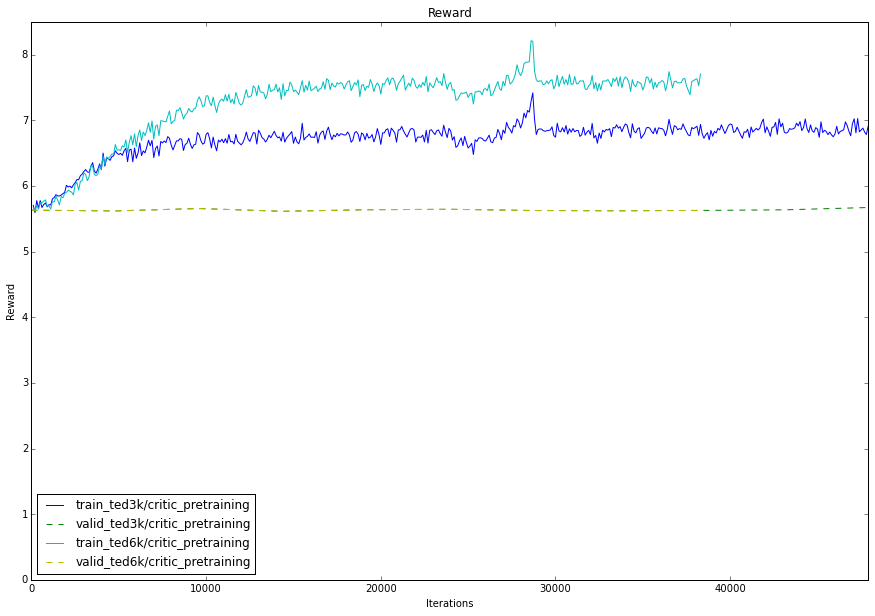

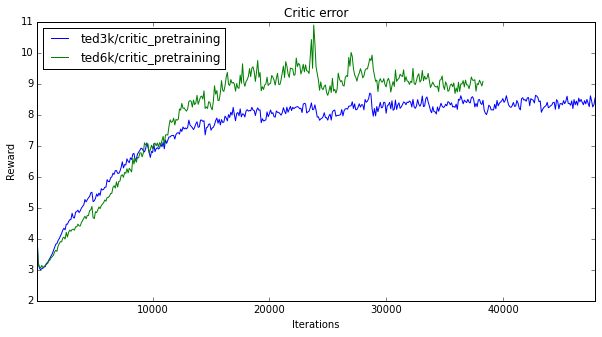

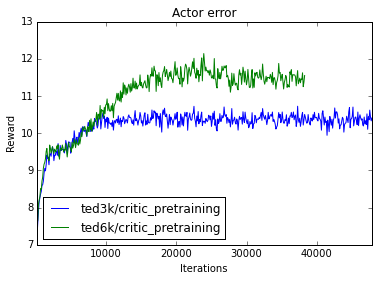

In [144]:
# Softmax 2, edit distance
compare_rewards_and_errors(
    ['ted3k/critic_pretraining',
     'ted6k/critic_pretraining'])    

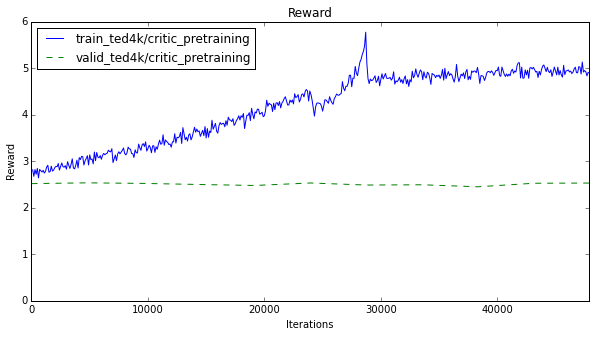

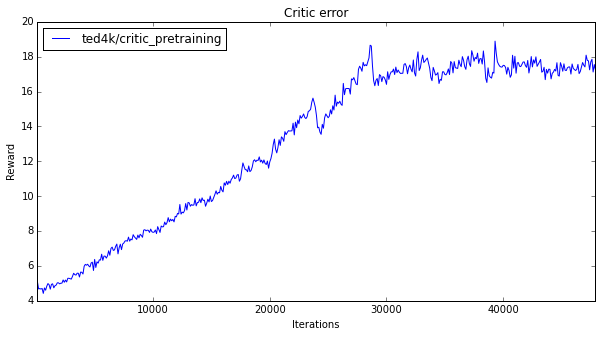

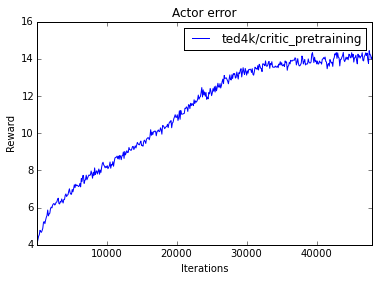

In [117]:
# Softmax 2, BLEU
compare_rewards_and_errors(
    ['ted4k/critic_pretraining'])

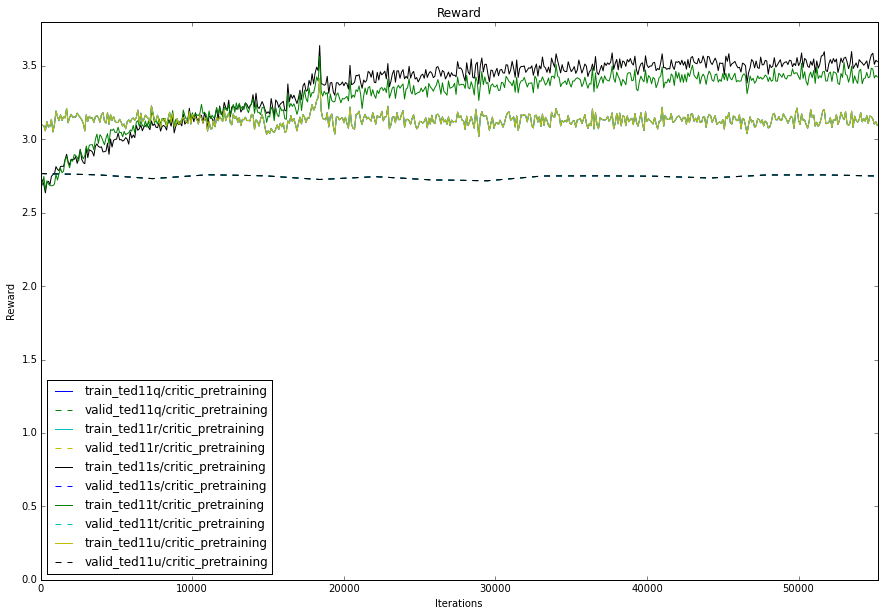

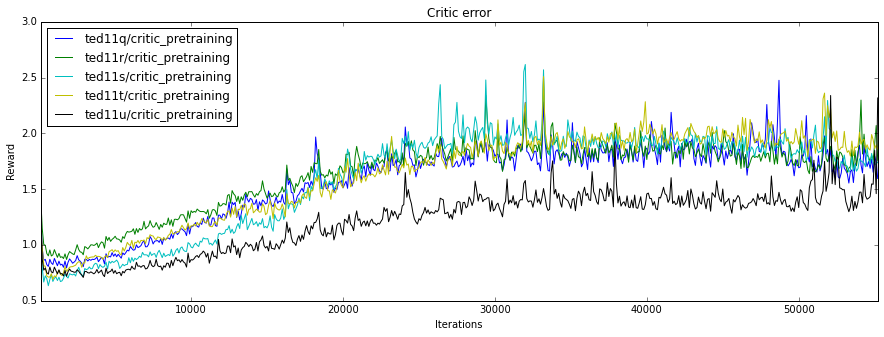

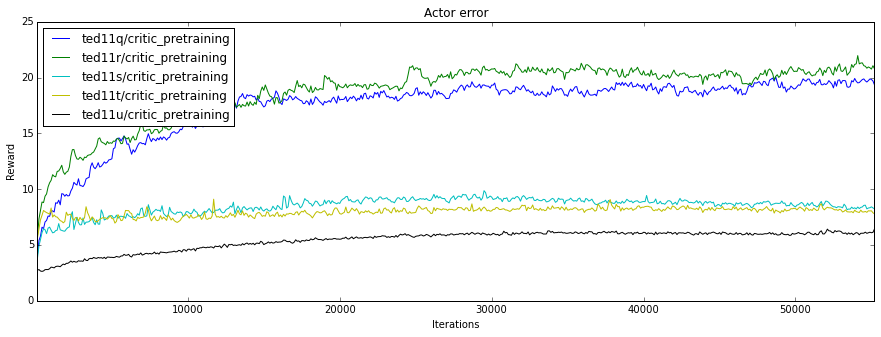

In [700]:
compare_rewards_and_errors(
    [#'ted11/critic_pretraining',
     #'ted11a/critic_pretraining',
     #'ted11b/critic_pretraining',
     'ted11q/critic_pretraining',
     'ted11r/critic_pretraining',
     'ted11s/critic_pretraining',
     'ted11t/critic_pretraining',
     'ted11u/critic_pretraining',
    ],
)

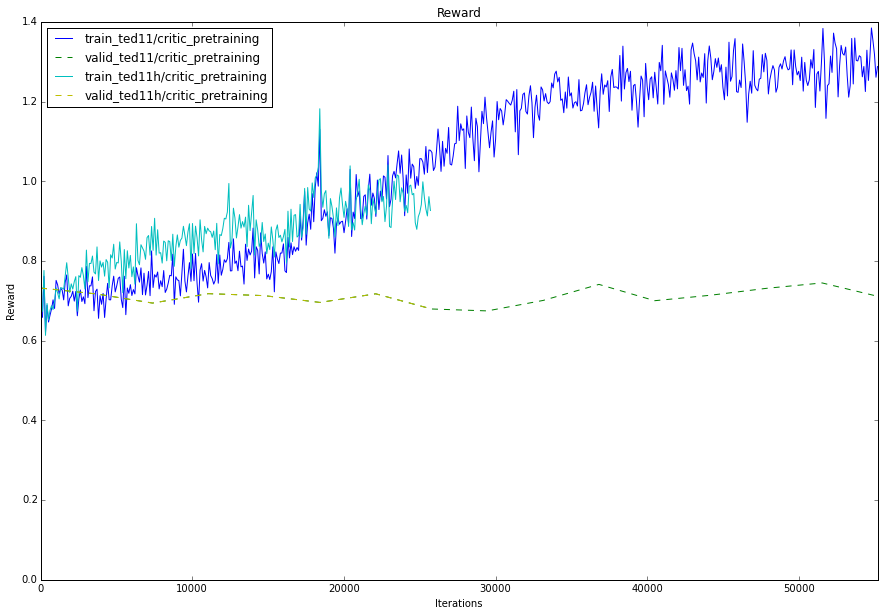

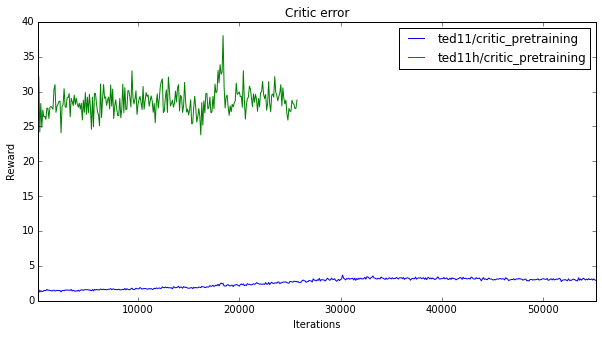

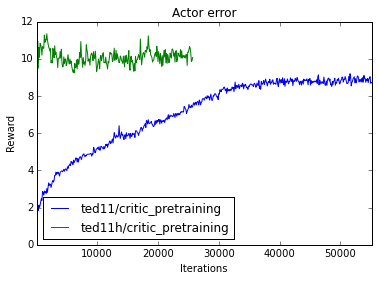

In [183]:
compare_rewards_and_errors([
        'ted11/critic_pretraining',
        'ted11h/critic_pretraining',
    ])

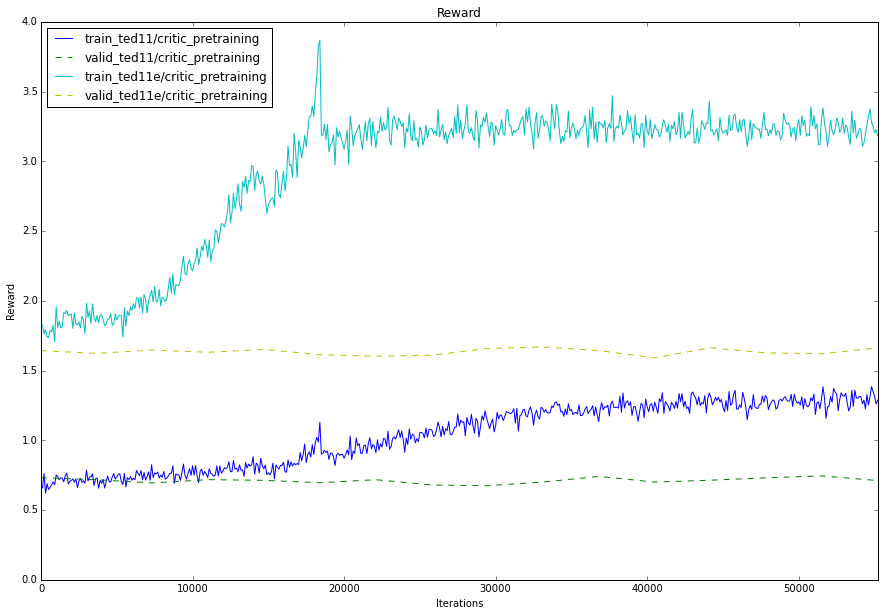

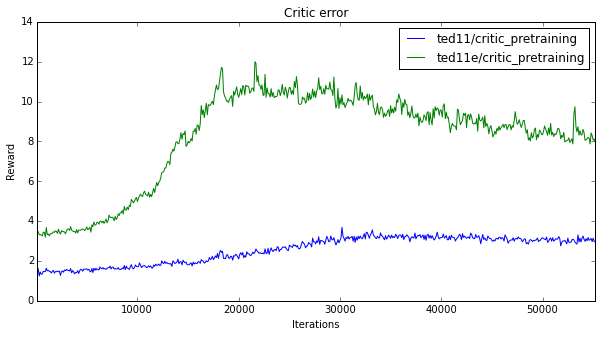

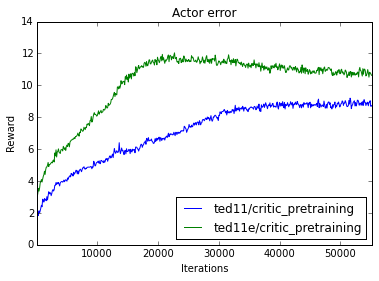

In [185]:
compare_rewards_and_errors([
        'ted11/critic_pretraining',
        'ted11e/critic_pretraining',
    ])

## Main 

In [942]:
# load_model('ted11u7/main.tar')
# load_model('ted11u8/main.tar')
# load_model('ted14/main.tar')
# load_model('ted14a/main.tar')
load_model('ted15/main.tar')
load_model('ted15b/main.tar')
# load_model('ted15a/main.tar')

best_valid_mean_total_reward 5.12157344818
mean_total_reward: 6.73055267334
best_valid_mean_total_reward 5.06236410141
mean_total_reward: 6.10983445909


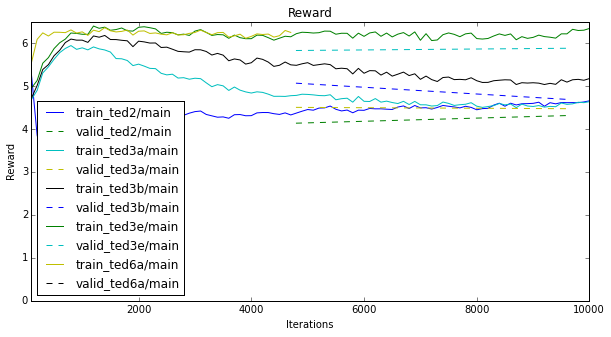

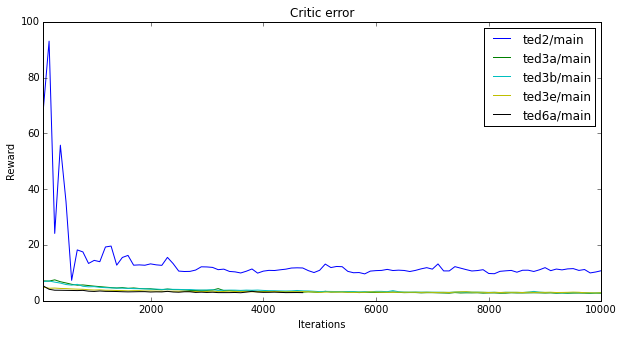

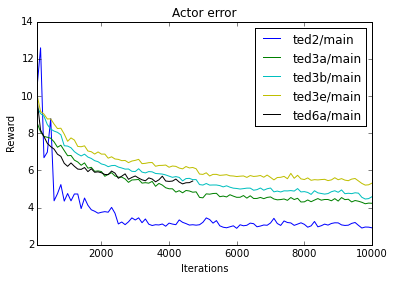

In [75]:
compare_rewards_and_errors(
    ['ted2/main', 
     #'ted3/main', 
     'ted3a/main',
     'ted3b/main',
     'ted3e/main',
     'ted6a/main'
    ], s=slice(10, 10000))

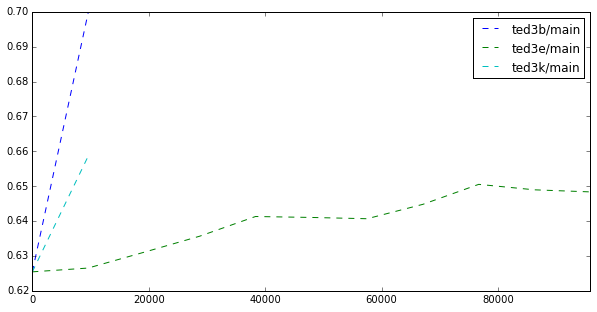

In [41]:
compare_per(
    [#'ted2/main', 
     #'ted3/main', 
     #'ted3a/main',
     'ted3b/main',
     'ted3e/main',
     'ted3k/main'
    ])

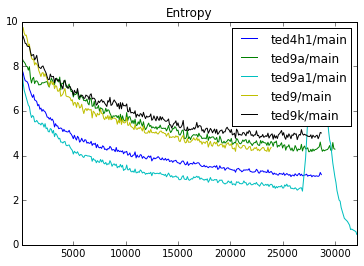

In [29]:
compare_entropies(
    [
        'ted4h1/main',
        'ted9a/main',
        'ted9a1/main',
        'ted9/main',
        'ted9k/main'
    ])

In [12]:
compare_rewards_and_errors(
    ['ted4/main', 'ted4a/main', 'ted4k1/main', 'ted4h1/main', 'ted4a1/main'])

KeyError: 'ted4/main'

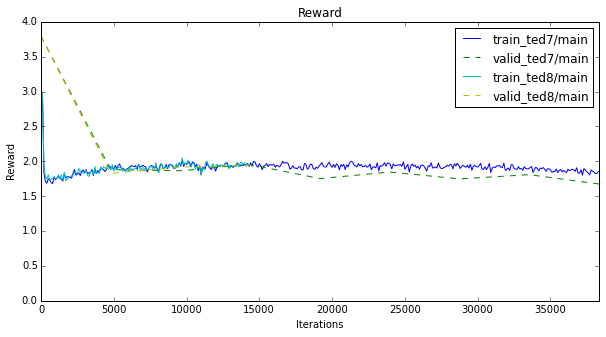

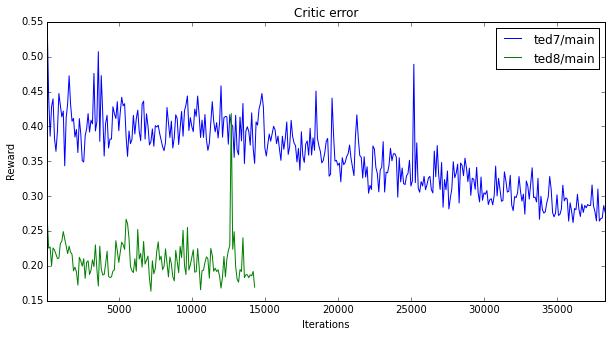

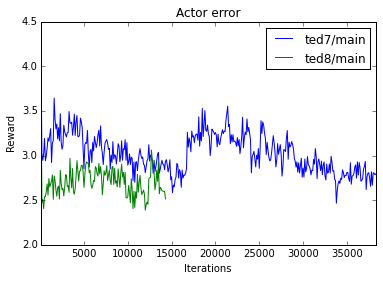

In [582]:
compare_rewards_and_errors(
    ['ted7/main', 'ted8/main'])

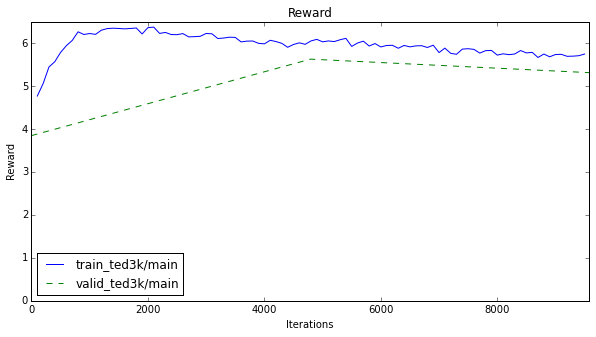

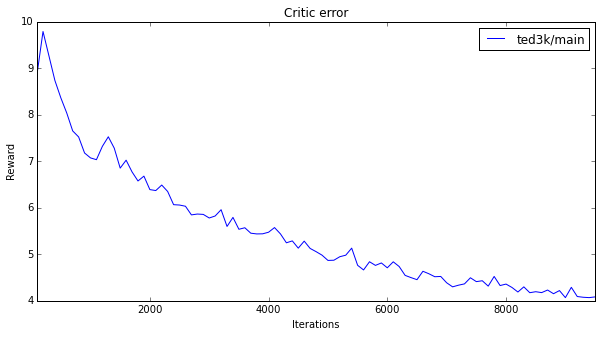

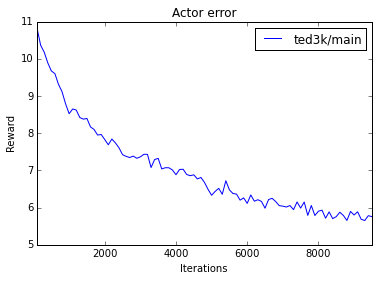

In [36]:
compare_rewards_and_errors(
    ['ted3k/main'])

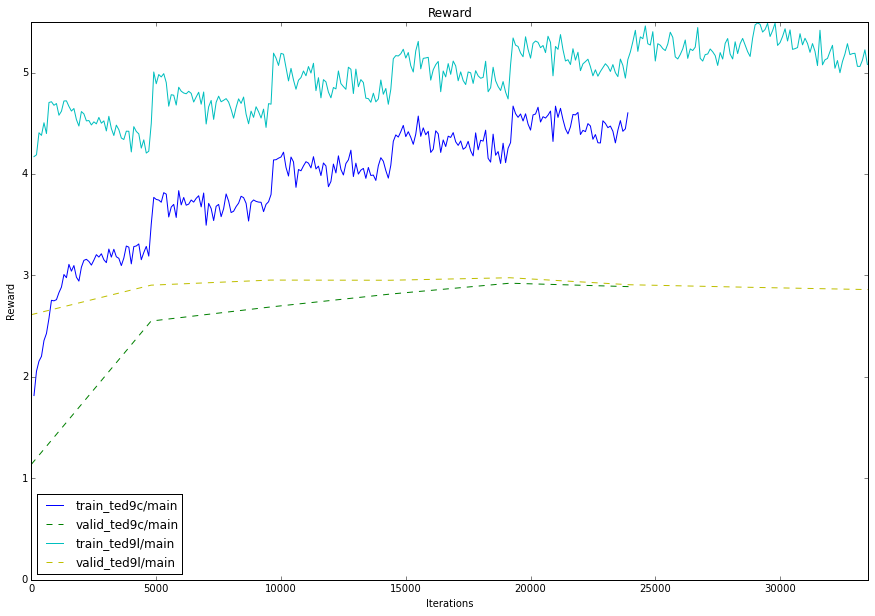

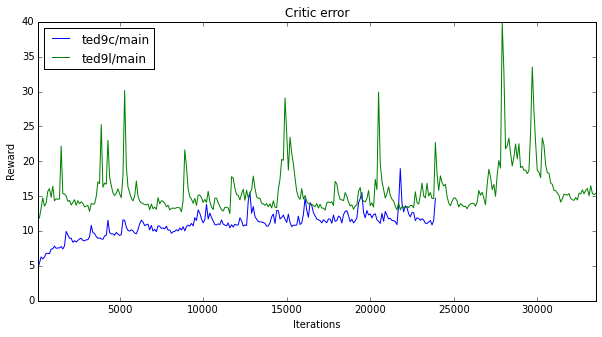

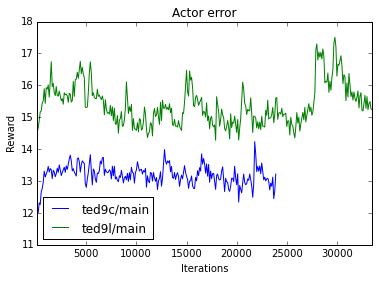

In [223]:
compare_rewards_and_errors([
        'ted9c/main',
        'ted9l/main',
    ])

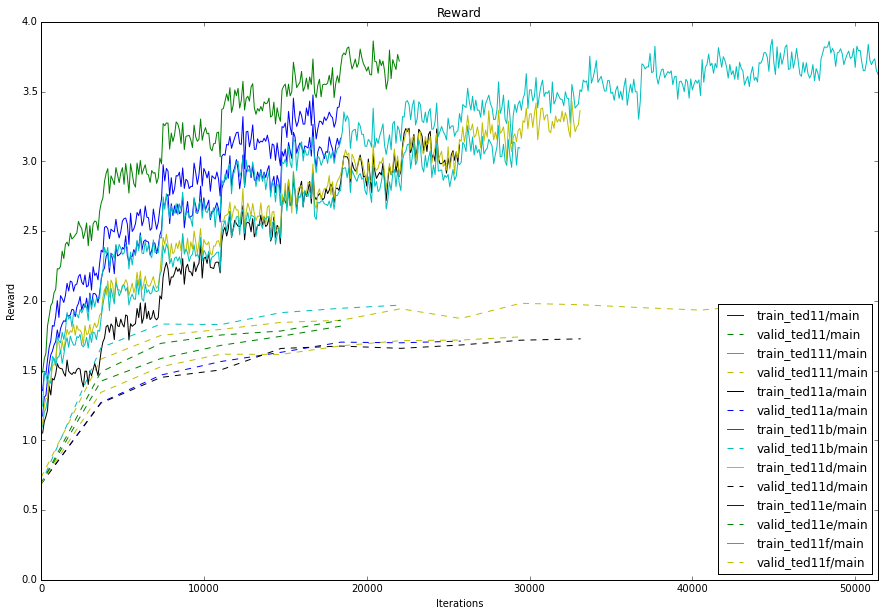

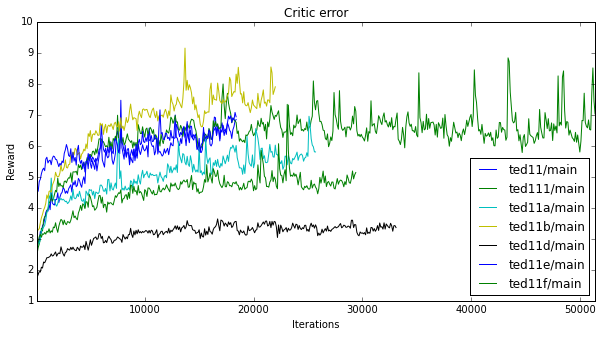

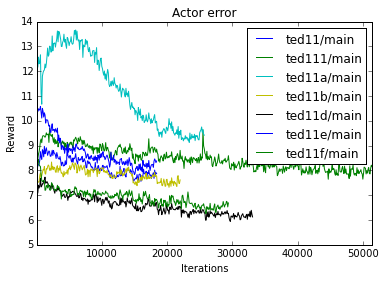

In [160]:
compare_rewards_and_errors([
        'ted11/main',
        'ted111/main',
        'ted11a/main',
        'ted11b/main',
        'ted11d/main',
        'ted11e/main',
        'ted11f/main'])

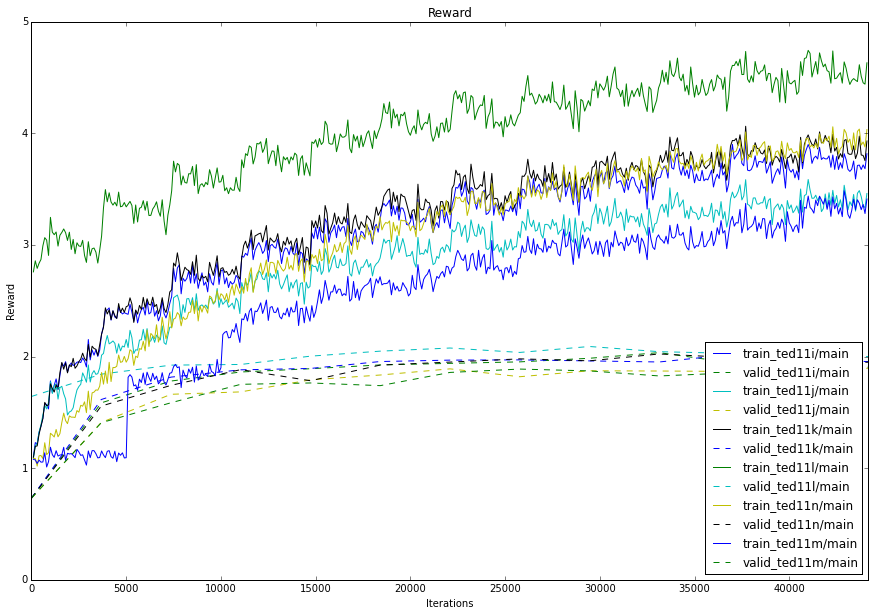

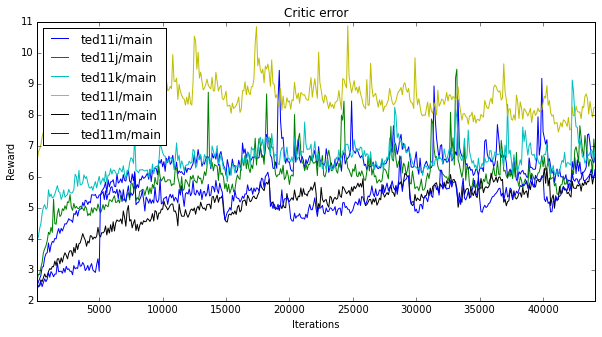

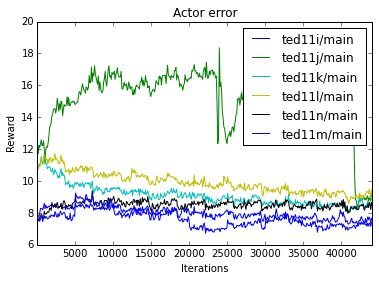

In [220]:
compare_rewards_and_errors([
        'ted11i/main',
        'ted11j/main',
        'ted11k/main',
        'ted11l/main',
        'ted11n/main',
        'ted11m/main',
    ])

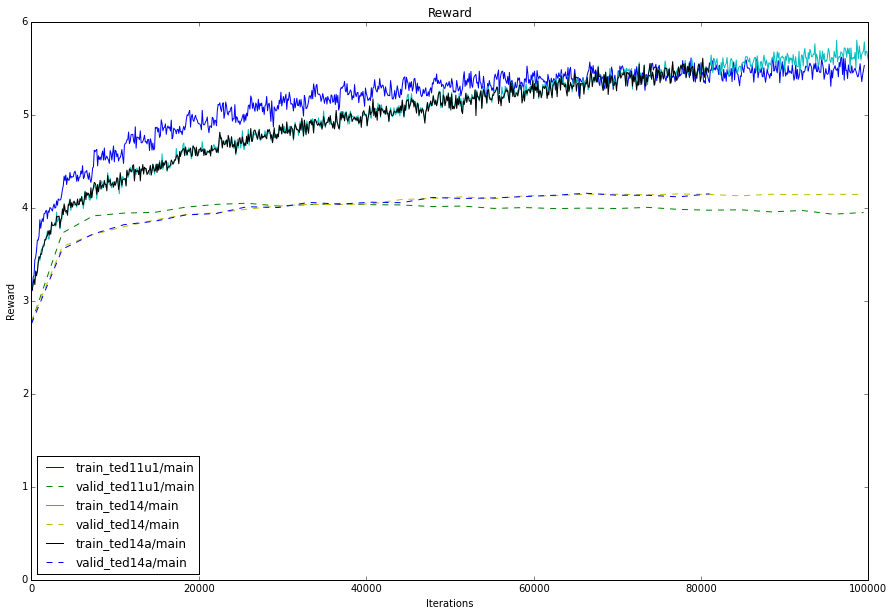

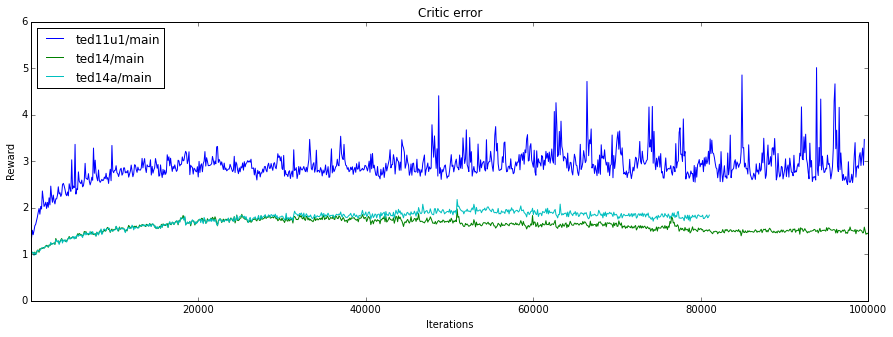

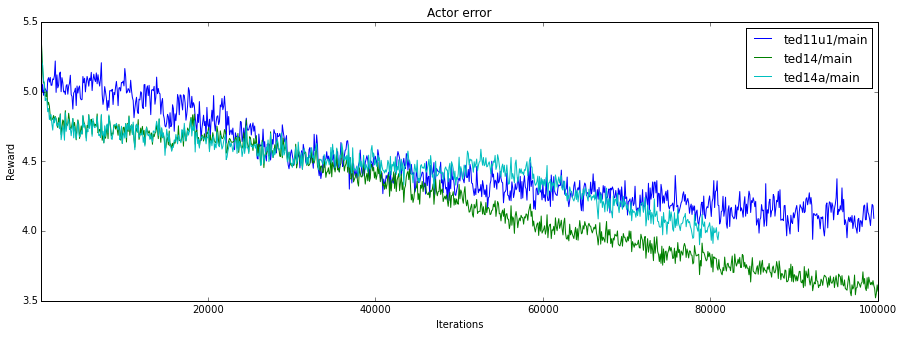

In [929]:
compare_rewards_and_errors([
    'ted11u1/main',
    #'ted11u6/main',
    #'ted11u7/main',
    #'ted11u8/main',
    'ted14/main',
    'ted14a/main'
    ],
    s=slice(100000))

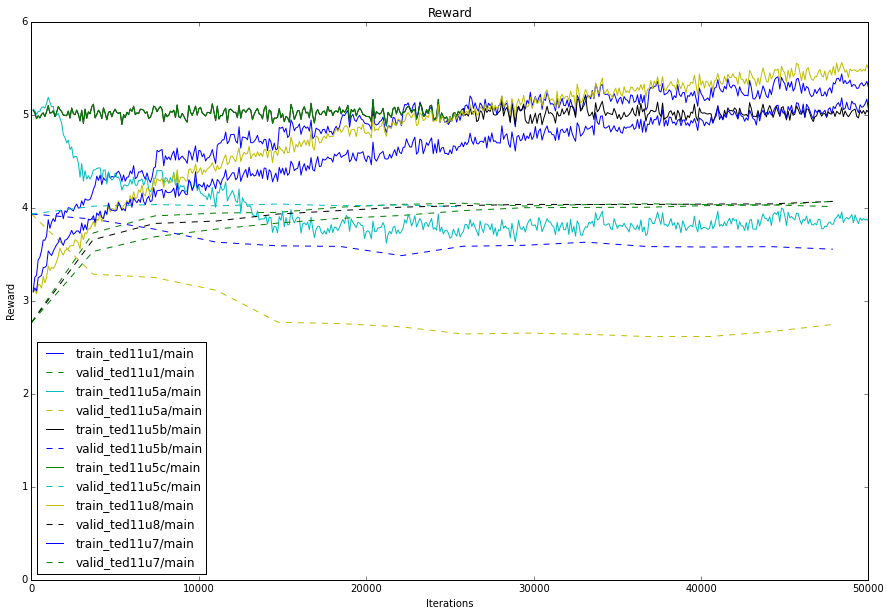

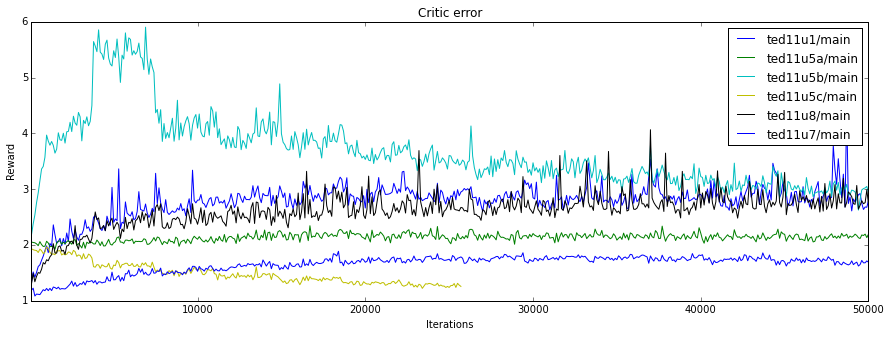

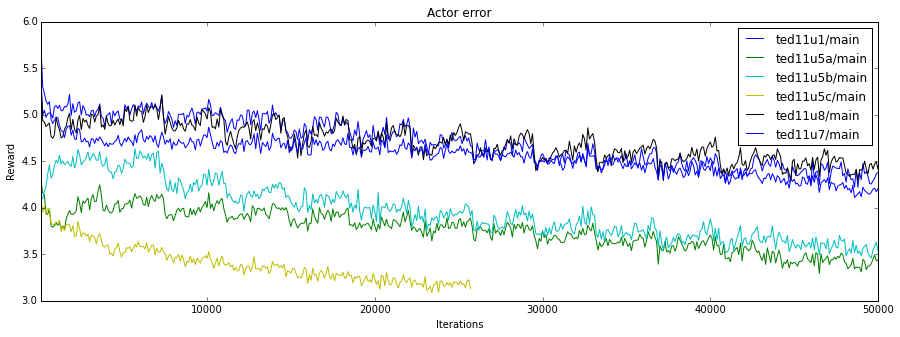

In [878]:
compare_rewards_and_errors([
    'ted11u1/main',
    'ted11u5a/main',
    'ted11u5b/main',
    'ted11u5c/main',
    'ted11u8/main',
    'ted11u7/main',
    ],
    s=slice(50000))

In [939]:
dfs['ted15b/main'].valid_per.dropna()

0        19.631764
4792     20.312286
9584     20.896858
14376    20.941597
19168    21.393073
23960    21.647881
28752    21.450895
33544    21.663690
38336    21.990562
43128    21.902035
47920    21.912130
52712    22.080272
57504    22.061219
Name: valid_per, dtype: float64

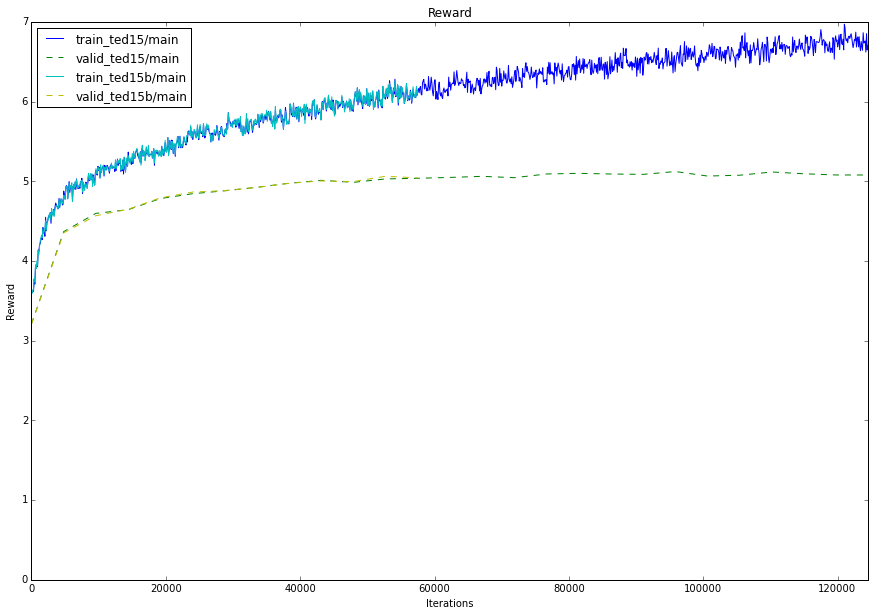

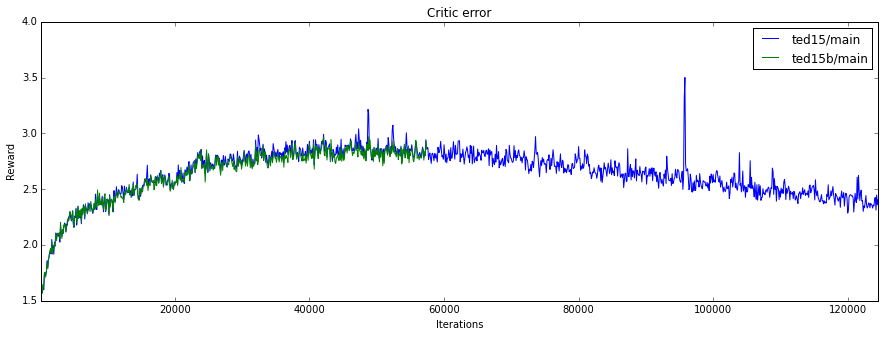

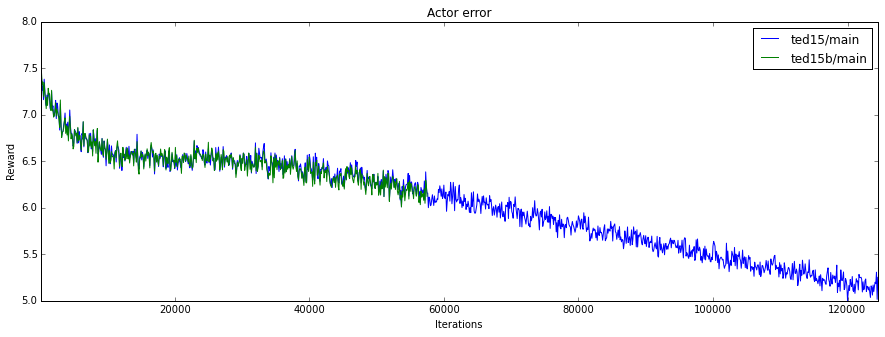

In [943]:
compare_rewards_and_errors([
    'ted15/main',
    'ted15b/main'
    ])

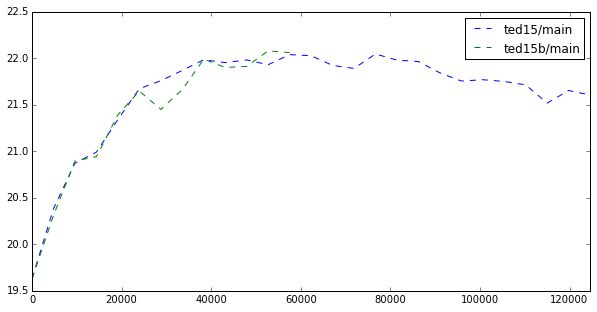

In [944]:
compare_per(
    ['ted15/main', 'ted15b/main'])

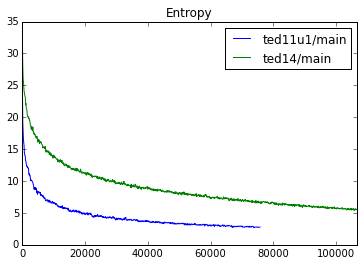

In [928]:
compare_entropies([
        'ted11u1/main',
        'ted14/main',
    ])

In [916]:
compare_gradient_norms(
        ['ted14/main',
         'ted14a/main'])

AttributeError: 'DataFrame' object has no attribute 'total_gradient_norm'

## Analysis

In [1048]:
import re
from StringIO import StringIO

def tex_escape(text):
    conv = {
        '%': r'\%',
        #'$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '~': r'\textasciitilde{}',
        '&': r'\&',
        '^': r'\^{}',
        '<s>': r' BOS ',
        '</s>': r' EOS ',
    }
    regex = re.compile('|'.join(re.escape(unicode(key)) 
                       for key in sorted(conv.keys(), key=lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

def print_critic_suggestions(it, i, just_from_groundtruth=False, p_threshold=0.0):
    result = StringIO()
    
    prediction_words = predictions[it][i].split()    
    groundtruth_words = groundtruth[it][i].split()
    
    print >>result, r"$\begin{array}{cc}"
    print >>result, r"\mathbf{{Groundtruth}} & \textrm{{ {} }}\\".format(tex_escape(" ".join(groundtruth_words[:groundtruth_words.index('</s>') + 1])))
    print >>result, r"\mathbf{{Prediction}} & \textrm{{ {} }}".format(tex_escape(" ".join(prediction_words[:prediction_words.index('</s>') + 1])))
    print >>result, r"\end{array}$"
    print >>result
    
    groundtruth_nums = set([word2num[word] for word in groundtruth[it][i].split()])
    
    print >>result, "$\\begin{array}{ccccc}"
    print >>result, r"\textrm{Word} & \textrm{Reward} & \textrm{Actor prob}. & \textrm{Q} & \textrm{Best Q} \\"
    for step in range(len(prediction_words)):
        actions = enumerate(values[it][step, i])
        if just_from_groundtruth:
            actions = [(n, q) for n, q in actions if n in groundtruth_nums]
        actions = [(n, q) for (n, q) in actions if probs[it][step, i, n] > p_threshold]
        best = list(sorted(actions, key=lambda (i, o): -o))[:5]
        print >>result, "{} & {:.6f} & {:.6f} & {:.6f} &".format(
            tex_escape(prediction_words[step]),
            rewards[it][step, i],
            probs[it][step, i, word2num[prediction_words[step]]],
            values[it][step, i, word2num[prediction_words[step]]],
        )
        print >>result, "\,".join([
            "{}({:.6f}, {:.6f})".format(tex_escape(num2word[c]), o, probs[it][step, i , c]) 
            for c, o in best]),
        print >>result, '\\\\'
        if prediction_words[step] == '</s>':
            break
    print >>result, "\\end{array}$"
    print >>result, r"\newpage"
    result.seek(0)
    return result.read()

def print_critic_suggestions2(it, i, just_from_groundtruth=False, p_threshold=0.0):
    result = StringIO()
    
    prediction_words = predictions[it][i].split()    
    groundtruth_words = groundtruth[it][i].split()
    
    print >>result, r"$\begin{array}{cc}"
    print >>result, r"\mathbf{{Groundtruth}} & \textrm{{ {} }}\\".format(tex_escape(" ".join(groundtruth_words[:groundtruth_words.index('</s>') + 1])))
    print >>result, r"\mathbf{{Prediction}} & \textrm{{ {} }}".format(tex_escape(" ".join(prediction_words[:prediction_words.index('</s>') + 1])))
    print >>result, r"\end{array}$"
    print >>result
    
    groundtruth_nums = set([word2num[word] for word in groundtruth[it][i].split()])
    
    print >>result, "\\begin{tabular}{cc}"
    # print >>result, r"\textrm{Word} & \textrm{Reward} & \textrm{Actor prob}. & \textrm{Q} & \textrm{Best Q} \\"
    print >>result, r"\textrm{Word} & \textrm{Best Q} \\"
    for step in range(len(prediction_words)):
        actions = enumerate(values[it][step, i])
        if just_from_groundtruth:
            actions = [(n, q) for n, q in actions if n in groundtruth_nums]
        actions = [(n, q) for (n, q) in actions if probs[it][step, i, n] > p_threshold]
        best = list(sorted(actions, key=lambda (i, o): -o))[:3]
        print >>result, "{} &".format(tex_escape(prediction_words[step]))
        print >>result, " ".join([
            "{}({:.3f})".format(tex_escape(num2word[c]), o) 
            for c, o in best]),
        print >>result, '\\\\'
        if prediction_words[step] == '</s>':
            break
    print >>result, "\\end{tabular}"
    result.seek(0)
    return result.read()

In [23]:
ted = H5PyMTDataset('targets', file_or_path='/data/lisatmp4/bahdanau/data/TED/de-en/ted.h5', which_sets=('train',))
num2word = ted.num2word
word2num = ted.word2num

In [980]:
load_model('ted15/main_verbose.tar')

best_valid_mean_total_reward 5.0852856636
mean_total_reward: 6.79454310735


In [982]:
log = logs['ted15/main_verbose']
print log.status['iterations_done']
train_cost = [log[t].get('train_cost') for t in range(0, log.status['iterations_done'] + 1)]
rewards = [log[t].get('readout_costs_rewards') for t in range(0, log.status['iterations_done'] + 1)]
mean_reward = [log[t].get('mean_reward') for t in range(0, log.status['iterations_done'] + 1)]
critic_cost = [log[t].get('readout_costs_mean_critic_cost') for t in range(0, log.status['iterations_done'] + 1)]
actor_cost = [log[t].get('readout_costs_mean_actor_cost') for t in range(0, log.status['iterations_done'] + 1)]

inputs = [log[t].get('average_inputs') for t in range(0, log.status['iterations_done'] + 1)]
predictions = [log[t].get('average_predictions') for t in range(0, log.status['iterations_done'] + 1)]
prediction_masks = [log[t].get('readout_costs_prediction_mask') for t in range(0, log.status['iterations_done'] + 1)]
groundtruth = [log[t].get('average_groundtruth') for t in range(0, log.status['iterations_done'] + 1)]

value_biases = [log[t].get('readout_costs_value_biases') for t in range(0, log.status['iterations_done'] + 1)]
values = [log[t].get('readout_costs_values') for t in range(0, log.status['iterations_done'] + 1)]
probs = [log[t].get('readout_costs_probs') for t in range(0, log.status['iterations_done'] + 1)]
outputs = [log[t].get('readout_costs_outputs') for t in range(0, log.status['iterations_done'] + 1)]

prediction_values = [log[t].get('readout_costs_prediction_values') for t in range(0, log.status['iterations_done'] + 1)]
prediction_outputs = [log[t].get('readout_costs_prediction_outputs') for t in range(0, log.status['iterations_done'] + 1)]

value_targets = [log[t].get('readout_costs_value_targets') for t in range(0, log.status['iterations_done'] + 1)]

3


In [1043]:
from IPython.display import Latex
numpy.set_printoptions(precision=4, suppress=True)
it = 2
i = 9
tex = print_critic_suggestions2(it, i, p_threshold=0.0000)
# print tex
Latex(tex)

<IPython.core.display.Latex object>

In [1049]:
print print_critic_suggestions2(it, i, p_threshold=0.0000)


$\begin{array}{cc}
\mathbf{Groundtruth} & \textrm{  BOS  and there \&apos;s one that i want to talk about .  EOS  }\\
\mathbf{Prediction} & \textrm{  BOS  one of them i want to tell you about here .  EOS  }
\end{array}$

\begin{tabular}{cc}
\textrm{Word} & \textrm{Best Q} \\
 BOS  &
,(3.582) and(3.529) \&apos;m(3.529) \\
one &
and(6.623) there(6.200) but(5.967) \\
of &
that(6.197) one(5.668) \&apos;s(5.467) \\
them &
that(5.408) one(5.118) i(5.002) \\
i &
that(4.796) i(4.629) ,(4.139) \\
want &
want(5.008) i(4.160) \&apos;t(3.361) \\
to &
to(4.729) want(3.497) going(3.396) \\
tell &
talk(3.717) you(2.407) to(2.133) \\
you &
about(1.209) that(0.989) talk(0.924) \\
about &
about(0.706) .(0.660) right(0.653) \\
here &
.(0.498) ?(0.291) --(0.285) \\
. &
.(0.195) there(0.175) know(0.087) \\
 EOS  &
.(0.168)  EOS (-0.093) ?(-0.173) \\
\end{tabular}



In [646]:
for i in range(0, 10):
    print print_critic_suggestions(it, i, p_threshold=0.001)

$\begin{array}{cc}
\mathbf{Groundtruth} & \textrm{  BOS  that \&apos;s progress : when we prove things wrong .  EOS  }\\
\mathbf{Prediction} & \textrm{  BOS  isn \&apos;t the progress : if we prove that \&apos;s really wrong .  EOS  }
\end{array}$

$\begin{array}{cccc}
\textrm{Word} & \textrm{Reward} & \textrm{Actor prob}. & \textrm{Critic best Q} \\
 BOS  & 0.000 & 1.000 &
 BOS (1.261, 1.000) \\
isn & 0.001 & 0.001 &
that(3.984, 0.157)\,there(3.163, 0.003)\,of(3.135, 0.002)\,let(3.114, 0.003)\,it(3.103, 0.082) \\
\&apos;t & 0.139 & 0.982 &
that(2.735, 0.006)\,this(2.422, 0.004)\,the(2.402, 0.002)\,\&apos;t(2.356, 0.982)\,about(2.251, 0.003) \\
the & 0.385 & 0.025 &
sharing(2.666, 0.001)\,progress(2.411, 0.108)\,possible(2.231, 0.003)\,when(2.178, 0.001)\,that(2.144, 0.288) \\
progress & 0.436 & 0.552 &
difference(1.713, 0.005)\,concept(1.694, 0.007)\,health(1.673, 0.004)\,program(1.624, 0.002)\,progress(1.607, 0.552) \\
: & 0.624 & 0.843 &
:(1.777, 0.843)\,when(1.440, 0.004)\,if(1.338

In [367]:
best_mean_reward = numpy.array([
        g.split().index('</s>') - 1 for g in groundtruth[it]
    ]).mean()
print "Best mean reward:", best_mean_reward

length = prediction_masks[it][:, i].sum()
print list( prediction_values[it][:, i][:length] )
print list( value_targets[it][:, i][:length] )
print list( (probs[it][:, i] * values[it][:, i]).sum(axis=-1)[1:length + 1] )

Best mean reward: 13.875
[0.85135376, 1.9749476, 1.5666727, 1.2047035, 0.95621145, 1.3350012, 1.8331257, 1.1212837, 1.0688899, 1.1804167, 0.73301333, 0.8139571, 1.2994342, 2.2184768, 1.5903366, 0.59918356, 0.51356542, 0.52722973, -0.059877075, 0.17668854, -0.00070162042]
[1.9171013, 1.5826744, 1.1915673, 1.0294173, 1.1446487, 1.6988121, 1.2918158, 0.97680783, 0.89685142, 0.81557077, 0.59529978, 0.92671192, 1.6988597, 5.848381, 0.86002684, 0.64811802, 0.66386282, 0.66233844, 0.24607919, 0.11978325, 0.0]
[1.9171017, 1.5826749, 1.1915678, 1.0294174, 1.1446489, 1.6988127, 1.2918155, 0.97680801, 0.89685178, 0.81557095, 0.59529978, 0.9267118, 1.698505, 3.045759, 0.70673901, 0.52282429, 0.48613217, 0.50686586, 0.18102823, -0.00061118929, 0.20152488]


/part/01/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/part/01/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/part/01/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


2.09167051315 2.09167


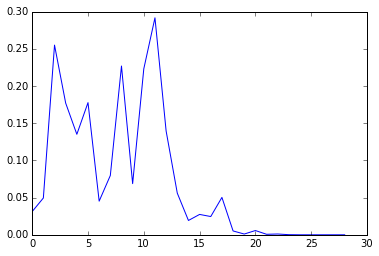

In [203]:
costs = ((prediction_values[it] - value_targets[it]) ** 2 * prediction_masks[it])
print train_cost[it], costs[1:].sum(axis=0).mean()
costs_per_step = ((prediction_values[it] - value_targets[it]) ** 2 * prediction_masks[it]).mean(axis=1)
pyplot.plot(costs_per_step[1:])

In [455]:
for step in range(5):
    print values[it][step, i][:10]

[  3.93403697e+00   1.50448346e+00   2.96061393e-04   3.70079398e+00
   3.49806237e+00   3.70079398e+00   3.70079398e+00   3.70079398e+00
   3.70079398e+00   3.70079398e+00]
[ 3.09560323  0.73396677  0.00819693  2.519485    2.65885258  2.519485
  2.519485    2.519485    2.519485    2.519485  ]
[  2.59737992e+00   1.59238231e+00  -2.13861931e-03   2.04827094e+00
   2.23579121e+00   2.04827094e+00   2.04827094e+00   2.04827094e+00
   2.04827094e+00   2.04827094e+00]
[  2.18376374e+00   1.42976058e+00  -1.64488156e-04   1.78234935e+00
   2.30555010e+00   1.78234935e+00   1.78234935e+00   1.78234935e+00
   1.78234935e+00   1.78234935e+00]
[ 1.70555747  0.6297816   0.00672351  1.68172026  2.05962801  1.68172026
  1.68172026  1.68172026  1.68172026  1.68172026]


## Debug 

In [546]:
#load_model('ted3a_debug/critic_pretraining.tar')
# load_model('ted3a_debug2/critic_pretraining.tar')
# load_model('ted3a_debug4/critic_pretraining.tar')
# load_model('ted3a_debug5/critic_pretraining.tar')
# load_model('ted3a_debug6/critic_pretraining.tar')
# load_model('ted3a_debug7/critic_pretraining.tar')
# load_model('ted3a_debug8/critic_pretraining.tar')
# load_model('ted3a_debug9/critic_pretraining.tar')
# load_model('ted3a_debug10/critic_pretraining.tar')
# load_model('ted2_debug/critic_pretraining.tar')
# load_model('ted3_debug11/critic_pretraining.tar')
# load_model('ted3_debug12/critic_pretraining.tar')
# load_model('ted3_debug13/critic_pretraining.tar')
load_model('ted3_debug14/critic_pretraining.tar')

mean_total_reward: 5.00625


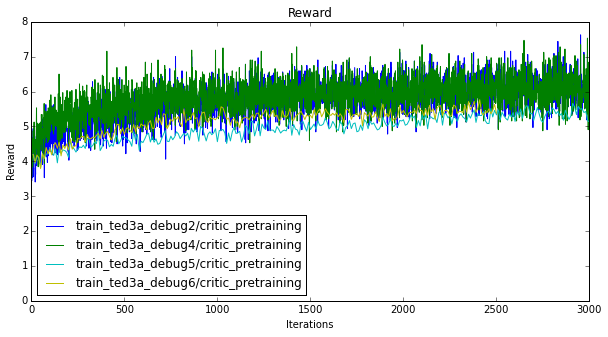

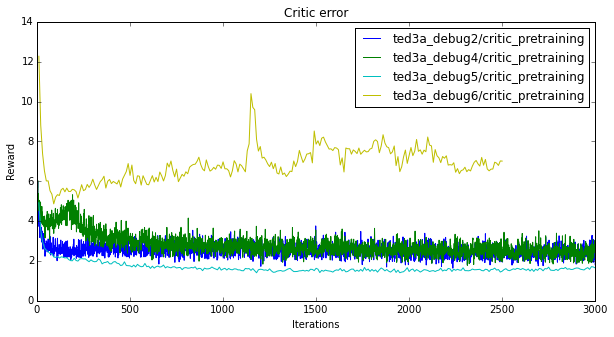

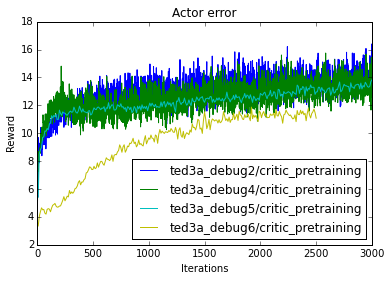

In [261]:
compare_rewards_and_errors(
    [#'ted3a_debug/critic_pretraining',
     'ted3a_debug2/critic_pretraining',
     'ted3a_debug4/critic_pretraining',
     'ted3a_debug5/critic_pretraining',
     'ted3a_debug6/critic_pretraining',   
    ]
)

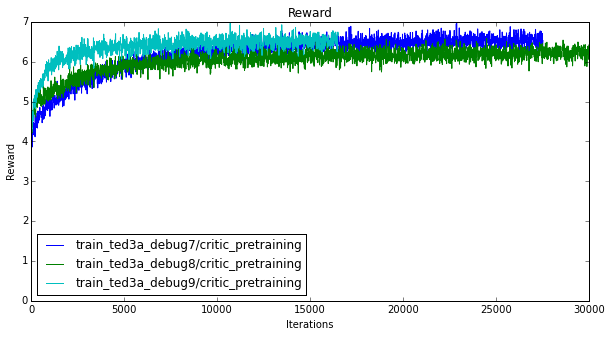

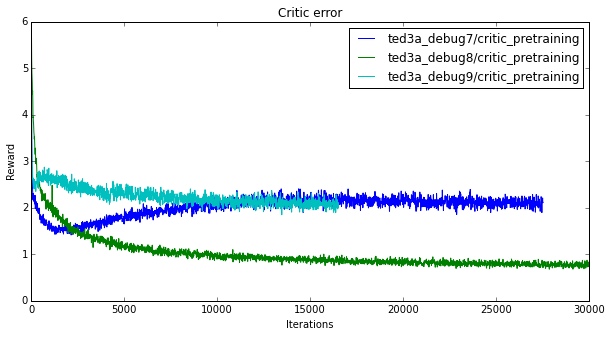

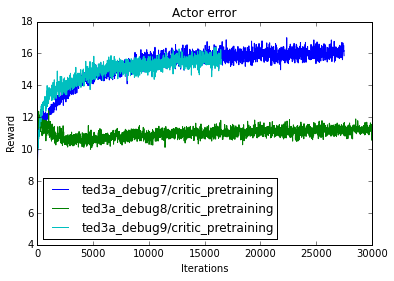

In [492]:
compare_rewards_and_errors(
    ['ted3a_debug7/critic_pretraining',
     'ted3a_debug8/critic_pretraining',
     'ted3a_debug9/critic_pretraining',
    ]
)

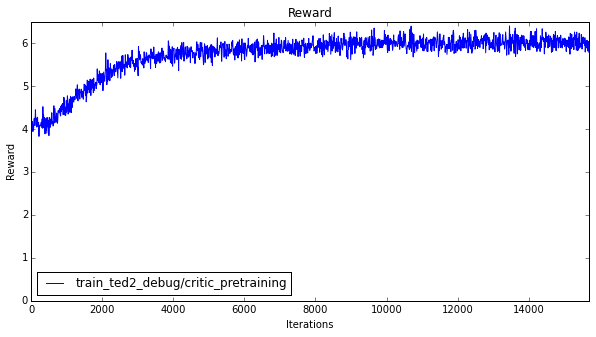

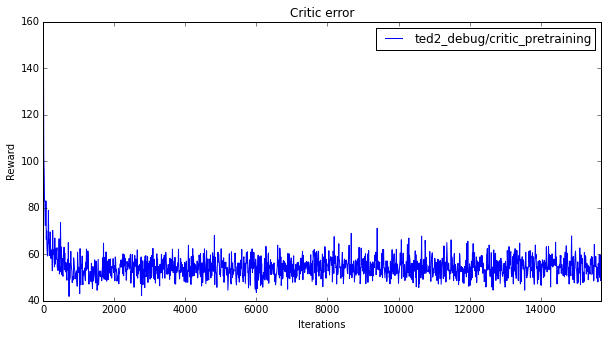

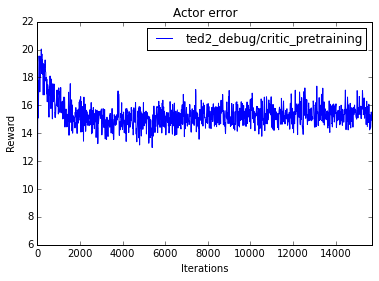

In [509]:
compare_rewards_and_errors(
    ['ted2_debug/critic_pretraining'])

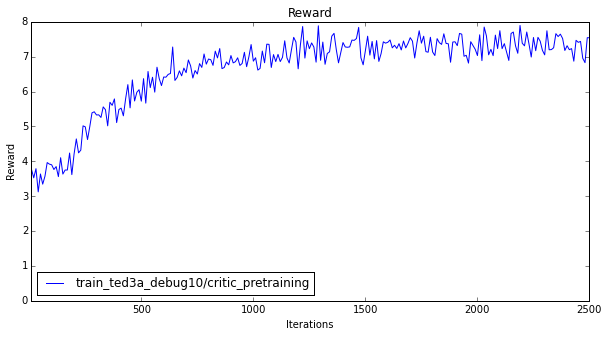

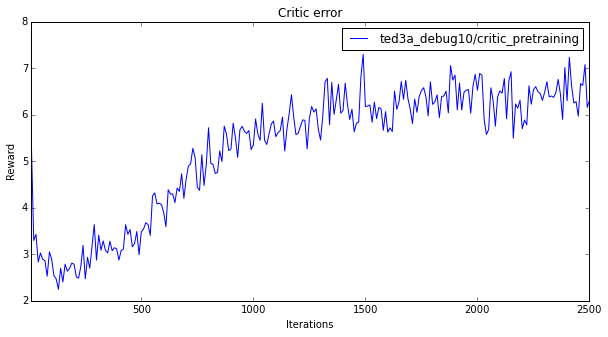

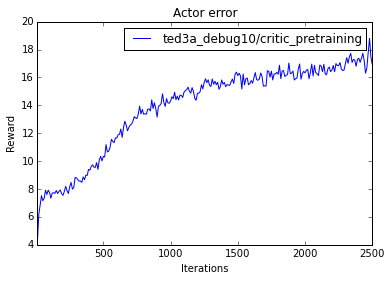

In [371]:
compare_rewards_and_errors(
    ['ted3a_debug10/critic_pretraining'])

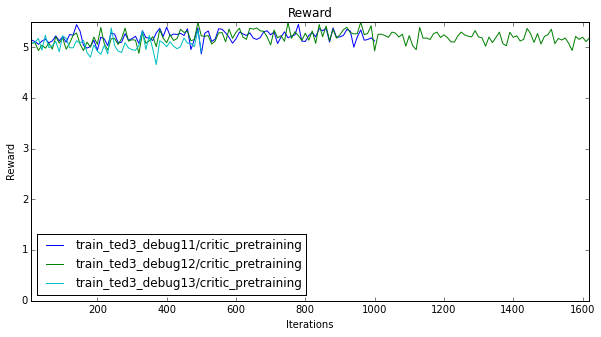

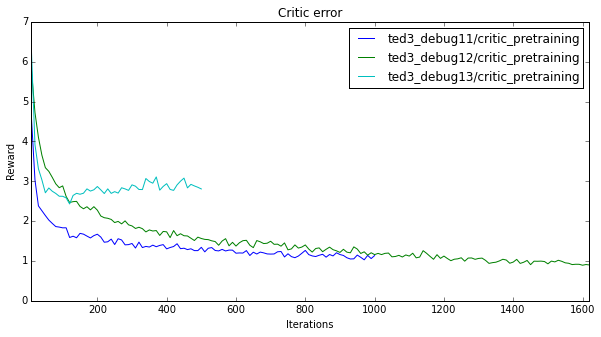

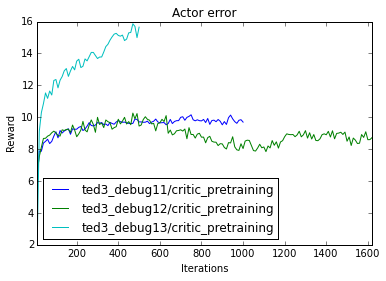

In [538]:
compare_rewards_and_errors(
    ['ted3_debug11/critic_pretraining',
     'ted3_debug12/critic_pretraining',
     'ted3_debug13/critic_pretraining'])

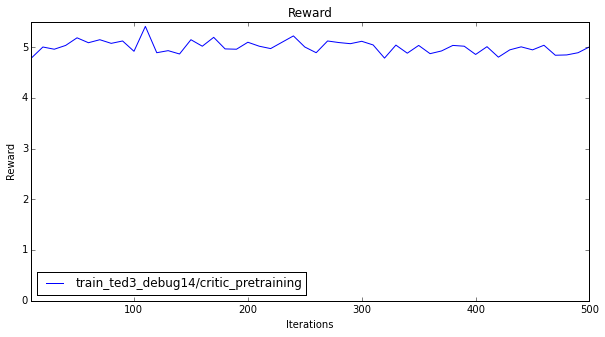

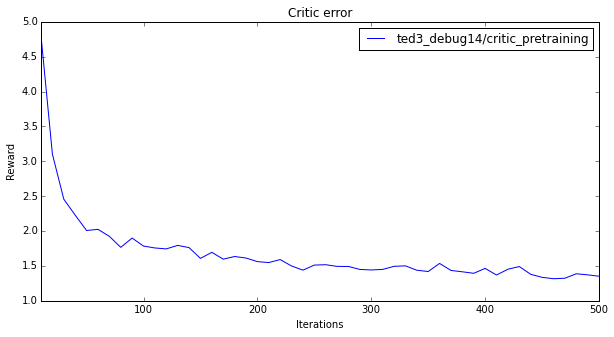

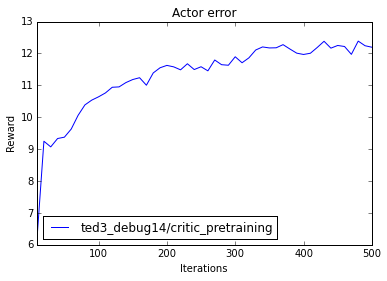

In [547]:
compare_rewards_and_errors(
    ['ted3_debug14/critic_pretraining'])

## Debug main

In [421]:
# load_model('ted3a_debug7/main.tar')
# load_model('ted3a_debug71/main.tar')
# load_model('ted3a_debug72/main.tar')
# load_model('ted3a_debug8/main.tar')
# load_model('ted3a_debug10/main.tar')
load_model('ted2_debug/main.tar')

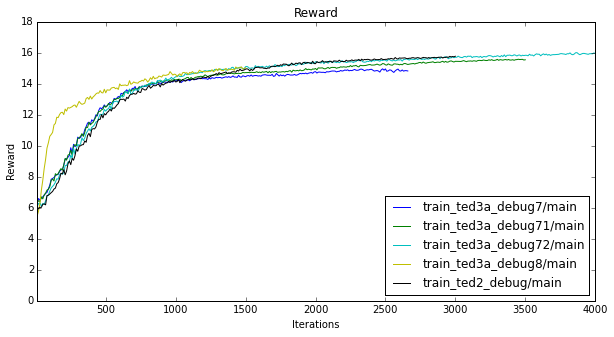

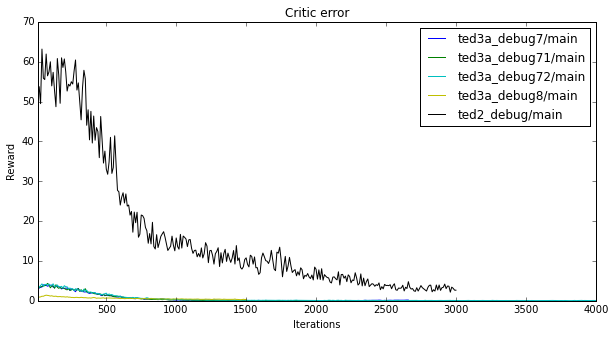

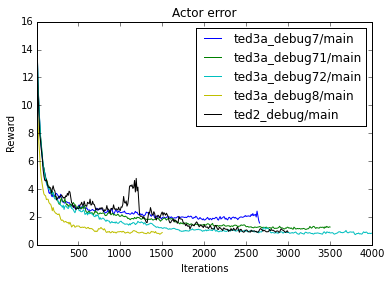

In [423]:
compare_rewards_and_errors([
    'ted3a_debug7/main',
    'ted3a_debug71/main',
    'ted3a_debug72/main',        
    'ted3a_debug8/main',
    'ted2_debug/main'
    ])

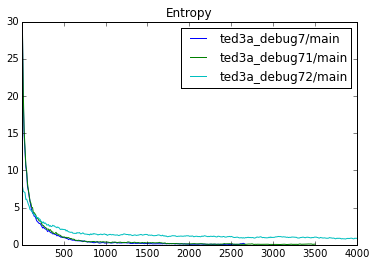

In [286]:
compare_entropies(
    ['ted3a_debug7/main', 
     'ted3a_debug71/main',
     'ted3a_debug72/main'])

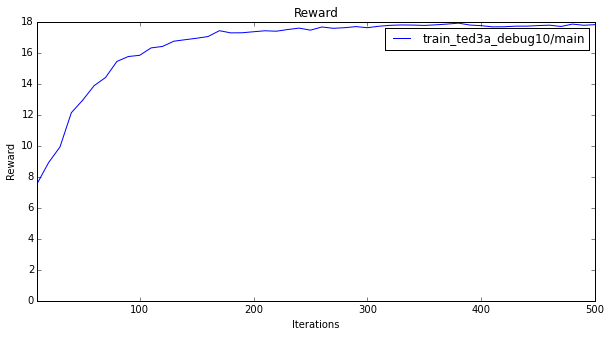

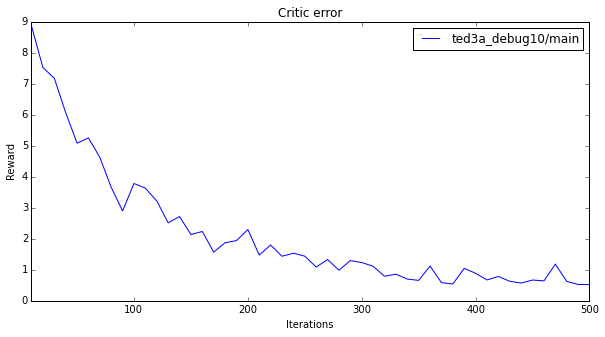

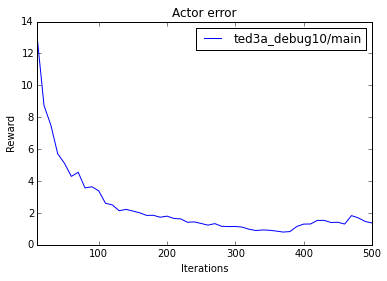

In [379]:
compare_rewards_and_errors (
    ['ted3a_debug10/main', ])

### BLEU

In [960]:
ll_main_train_bleu = dfs['ted1y/main'].train_per.dropna()
ll_main_valid_bleu = dfs['ted1y/main'].valid_per.dropna()
ll_annealing_train_bleu = dfs['ted1y/annealing'].train_per.dropna()
ll_annealing_valid_bleu = dfs['ted1y/annealing'].valid_per.dropna()
ac_main_train_bleu = dfs['ted15/main'].train_per.dropna()
ac_main_valid_bleu = dfs['ted15/main'].valid_per.dropna()

In [1051]:
IPython.display.set_matplotlib_formats('pdf')

lw = 2
pyplot.figure(figsize=(6, 3))
pyplot.plot(range(0, len(ll_main_valid_bleu)), ll_main_valid_bleu, 'b', linewidth=lw)
pyplot.plot(range(8, len(ll_annealing_valid_bleu) + 8), ll_annealing_valid_bleu, 'g',linewidth=lw)
pyplot.plot(range(5, len(ac_main_valid_bleu) + 5), ac_main_valid_bleu, 'y', linewidth=lw)
pyplot.plot(range(0, len(ll_main_train_bleu)), ll_main_train_bleu, 'b--', linewidth=lw)
pyplot.plot(range(8, len(ll_annealing_valid_bleu) + 8), ll_annealing_train_bleu, 'g--', linewidth=lw) 
pyplot.plot(range(5, len(ac_main_valid_bleu) + 5), ac_main_train_bleu, 'y--', linewidth=lw)            

pyplot.legend(
    ['LL valid, $\\alpha=10^{-3}$',
     'LL valid, $\\alpha=10^{-4}$',
     'AC valid, $\\alpha=10^{-3}$',
     'LL train, $\\alpha=10^{-3}$',
     'LL train, $\\alpha=10^{-4}$',
     'AC train, $\\alpha=10^{-3}$'
     ], loc='best')
pyplot.xlim((0, 50))
pyplot.ylim((10, 40))
pyplot.xlabel("Epochs")
pyplot.ylabel("BLEU")

In [970]:
IPython.display.set_matplotlib_formats?